In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from reader import *
radra+=pi

In [3]:
vecdl = vectorize(dl, excluded=['omegam'])

Need some objective function to minimise. Choose chi-squared for our goodness of fit!

In [4]:
def formin(omegam):
    """Returns chi squared"""
    lumdists = vecdl(zs, omegam)
    muths = muth(lumdists)
    return sum(((muths - mus)/(mues))**2)

Best off using just the regular scipy minimisation routines, rather than any crazy stuff.

Need to have bounds here or algorithm gets stuck.

In [5]:
from scipy.optimize import minimize

res = minimize(formin, 0.3, bounds=[(0,1)])

In [6]:
omegam = res.x

Let's plot the liklehood function, to see if we are trapped in any global minima

In [7]:
theseomegas = arange(0, 1, 0.001)
vecformin = vectorize(formin)
thesechisq = vecformin(theseomegas)

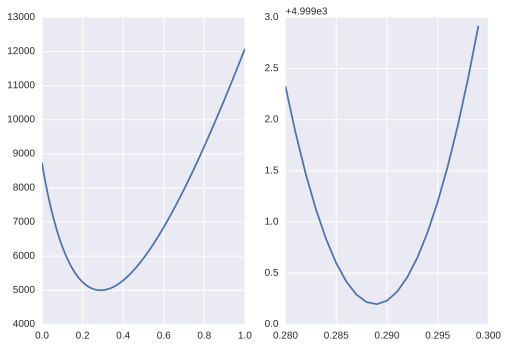

In [8]:
f, (ax1, ax2) = subplots(1, 2)
ax1.plot(theseomegas, thesechisq)
ax2.plot(theseomegas[280:300], thesechisq[280:300])

Let's take a look at the residuals. We could spend ages simulating datasets to get good values for errors on this $\Omega_M$, but this actually doesn't matter. We just want minimised residuals. There could be some argument that we have not included the errors of all of these data points, but it doesn't really matter that much for this analysis.

In [9]:
dmu = muth(vecdl(zs, omegam)) - mus
zsorted, dmusorted, dmuesorted = zip(*sorted(zip(zs, dmu, mues)))
zsorted = array(zsorted)
dmusorted = array(dmusorted)
dmuesorted = array(dmuesorted)

-0.38644105788


(array([   2.,    6.,   15.,   37.,   92.,  177.,  214.,  155.,   40.,    2.]),
 array([-11.57598489,  -9.73254788,  -7.88911087,  -6.04567386,
         -4.20223685,  -2.35879984,  -0.51536284,   1.32807417,
          3.17151118,   5.01494819,   6.8583852 ]),
 <a list of 10 Patch objects>)

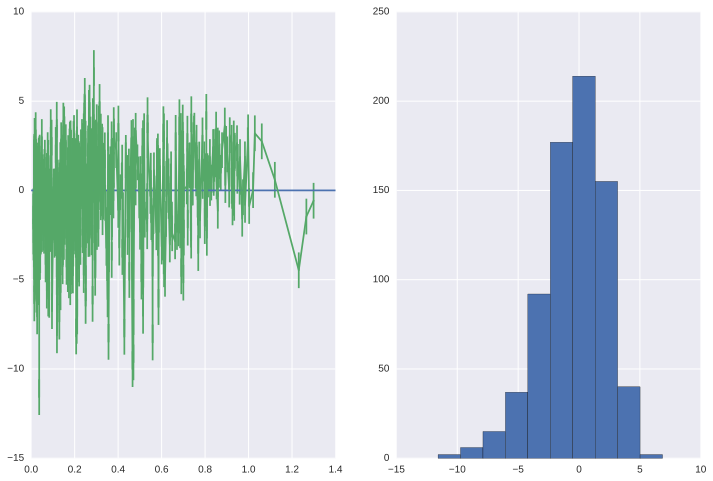

In [10]:
print(sum(dmu/mues)/len(dmu))

f, (ax1, ax2) = subplots(1, 2, figsize=(12, 8))

ax1.plot((0, 1.4), (0, 0))
ax1.errorbar(zsorted, dmusorted/dmuesorted, yerr=1,)
ax2.hist(dmu/mues)

In [11]:
from scipy.stats import pearsonr

In [12]:
pearsonr(zsorted, dmusorted/dmuesorted)

(0.20310697089090127, 2.4900493786233114e-08)

Look, they're pretty much randomly distributed. Get over it man.

In [13]:
from pyanis import arrayofanis

In [14]:
anismap = arrayofanis(radra, raddec, dmu)

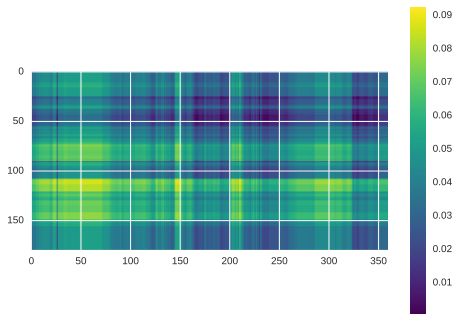

In [20]:
figure()
imshow(anismap.T, interpolation='none', cmap='viridis')
colorbar()

In [16]:
from pyanis import magrwithrot

maganismap = arrayofanis(radra, raddec, dmu, method=magrwithrot)

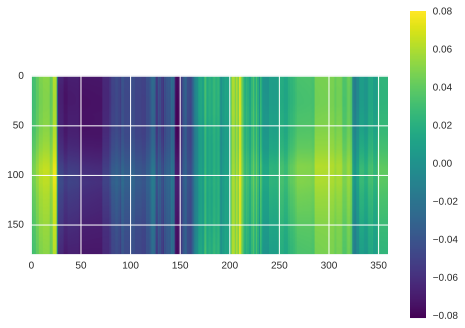

In [21]:
figure()
imshow(maganismap.T, interpolation='none', cmap='viridis')
colorbar()

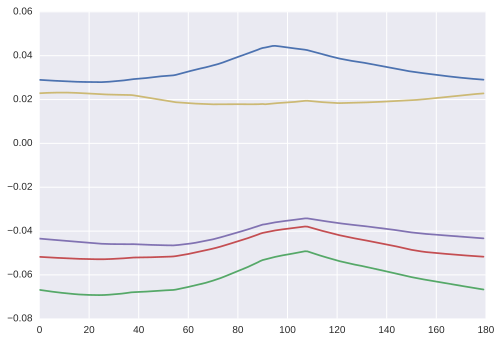

In [18]:
plot(range(180), maganismap[0, :])
plot(range(180), maganismap[45, :])
plot(range(180), maganismap[90, :])
plot(range(180), maganismap[135, :])
plot(range(180), maganismap[180, :])

IndexError: index 180 is out of bounds for axis 1 with size 180

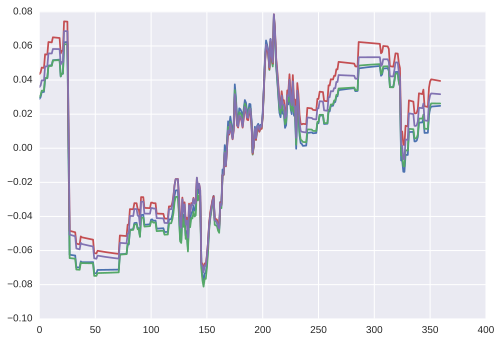

In [19]:
plot(range(360), maganismap[:, 0])
plot(range(360), maganismap[:, 45])
plot(range(360), maganismap[:, 90])
plot(range(360), maganismap[:, 135])
plot(range(360), maganismap[:, 180])